
## MLS Case Study PCA
-----------------------------
## Context:
-----------------------------
In this case study, we will use the Education dataset which contains information on educational institutes in USA. The data has various attributes such as number of applications received, enrollments, faculty education, financial aspects and graduation rate of each institute. 

-----------------------------
## Objective: 
-----------------------------
The objective of this problem is to reduce the number of features by using dimensionality reduction techniques like PCA and extract insights. 

-----------------------------
## Dataset: 
-----------------------------

The Education dataset contains information on various colleges in USA. It contains the following information:

- Names: Names of various universities and colleges
- Apps: Number of applications received
- Accept: Number of applications accepted
- Enroll: Number of new students enrolled
- Top10perc: Percentage of new students from top 10% of Higher Secondary class
- Top25perc: Percentage of new students from top 25% of Higher Secondary class
- F_Undergrad: Number of full-time undergraduate students
- P_Undergrad: Number of part-time undergraduate students
- Outstate: Number of students for whom the particular college or university is out-of-state tuition
- Room_Board: Cost of room and board
- Books: Estimated book costs for a student
- Personal: Estimated personal spending for a student
- PhD: Percentage of faculties with a Ph.D.
- Terminal: Percentage of faculties with terminal degree
- S_F_Ratio: Student/faculty ratio
- perc_alumni: Percentage of alumni who donate
- Expend: The instructional expenditure per student
- Grad_Rate: Graduation rate

## Importing libraries and overview of the dataset

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#Importing PCA
from sklearn.decomposition import PCA

#### Loading data

In [24]:
# data=pd.read_csv("Education_Post_12th_Standard.csv")

data = pd.read_csv("Education_Post_12th_Standard.csv")


In [25]:
data.head(10)

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Albright College,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Alderson-Broaddus College,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [26]:
# Create target variable
data['Acceptance_rate'] = data['Accept']/data['Apps']
data["Target"] = (data["Acceptance_rate"] < 0.6).astype(int)
data = data.drop('Acceptance_rate',axis=1)
data

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate,Target
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0
773,Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,0
774,Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,0
775,Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1


In [27]:
data.shape

(777, 19)

#### Check the info of the data

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F_Undergrad  777 non-null    int64  
 7   P_Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room_Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S_F_Ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad_Rate    777 non-null    int64  
 18  Target       777 non-null    int32  
dtypes: float

**Observations:**

- There are 777 observations and 18 columns in the dataset.
- All columns have 777 non-null values i.e. there are no missing values.
- All columns are numeric except the Names column which is of object data type.

## Data Preprocessing and Exploratory Data Analysis

#### Check if all the college names are unique

In [29]:
data.Names.nunique()

777

**Observations:**

- All college names are unique
- As all entries are unique, it would not add value to our analysis. We can drop the Names column. 

In [30]:
#Dropping Names column 
data.drop(columns="Names", inplace=True)

#### Summary Statistics

In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F_Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P_Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room_Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


**Observations:**

- On an average, approx 3,000 applications are received in US universities, out of which around 2,000 applications are accepted by the universities and around 780 new students get enrolled.
- The standard deviation is very high for these variables - Apps, Accepted, Enroll which shows the variety of universities and colleges.
- The average cost for room and board, books, and personal expense is approx 4,357, 550, and 1,350 dollars respectively.
- The average number of full time undergrad students are around 3700 whereas the average number of part-time undergrad students stand low at around 850.
- PhD and Grad_Rate have a maximum value of greater than 100 which is not possible as these variables are in percentages. Let's see how many such observations are there in the data.

In [32]:
data[(data.PhD>100) | (data.Grad_Rate>100)]

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate,Target
95,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118,0
582,529,481,243,22,47,1206,134,4860,3122,600,650,103,88,17.4,16,6415,43,0


In [33]:
data[(data.Apps>40000)]

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate,Target
483,48094,26330,4520,36,79,21401,3712,7410,4748,690,2009,90,95,19.5,19,10474,77,1


**There is just one such observation for each variable. We can cap the values to 100%.**

In [34]:
data.loc[582,"PhD"]=100
data.loc[95,"Grad_Rate"]=100

#### Let's check the distribution and outliers for each column in the data

Apps
Skew : 3.72


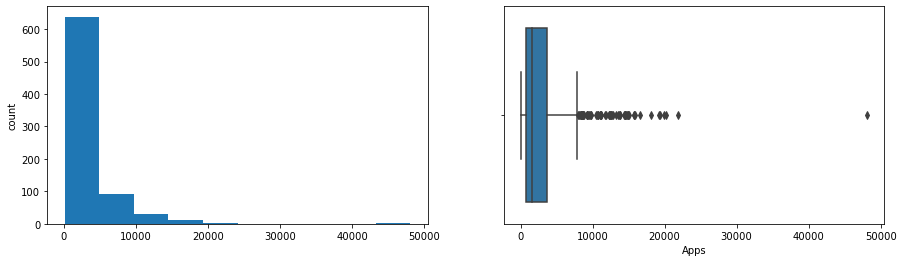

Accept
Skew : 3.42


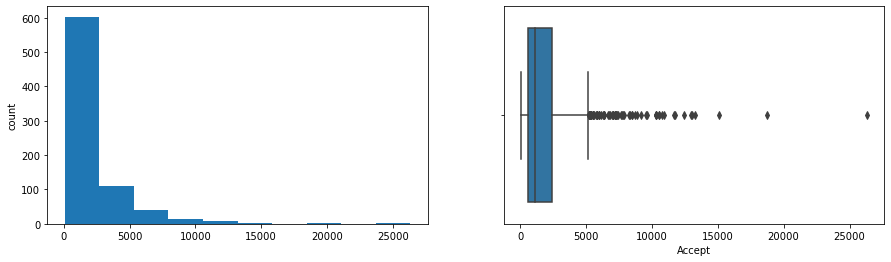

Enroll
Skew : 2.69


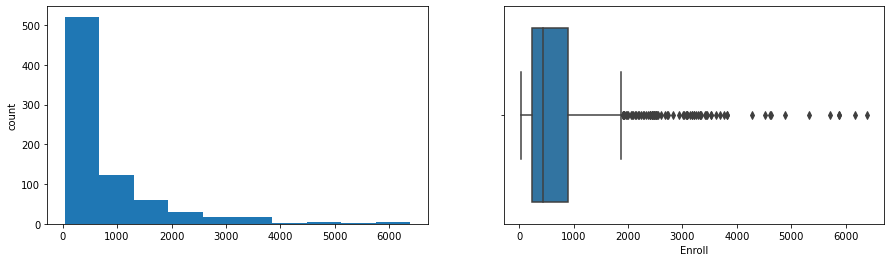

Top10perc
Skew : 1.41


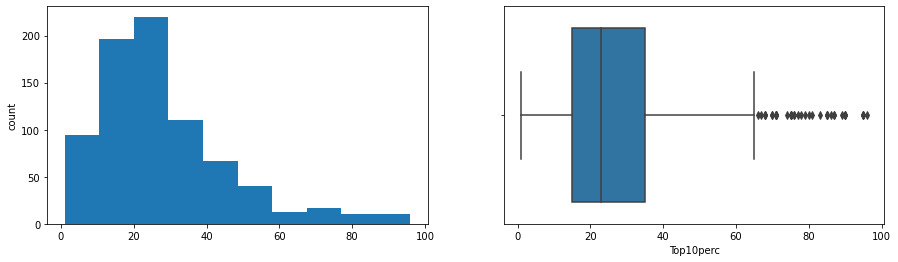

Top25perc
Skew : 0.26


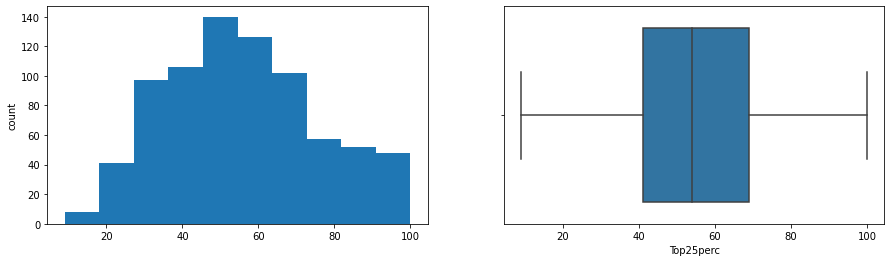

F_Undergrad
Skew : 2.61


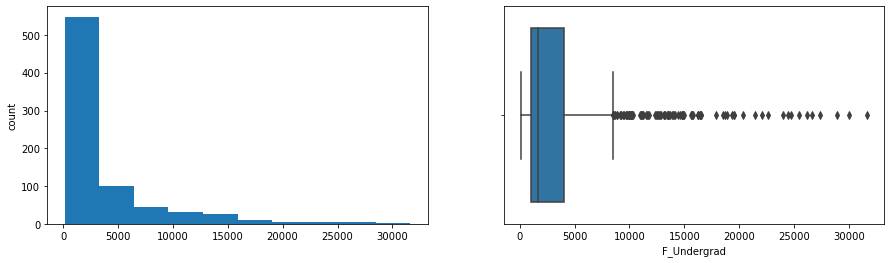

P_Undergrad
Skew : 5.69


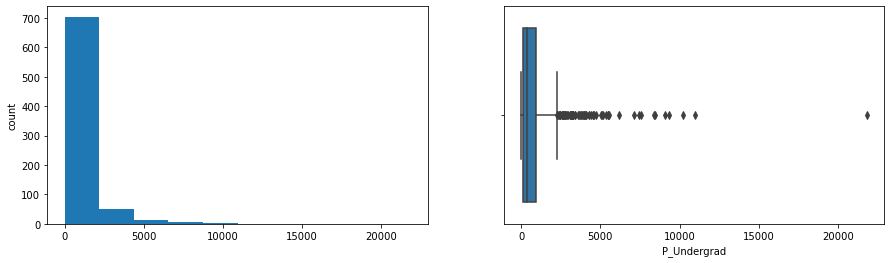

Outstate
Skew : 0.51


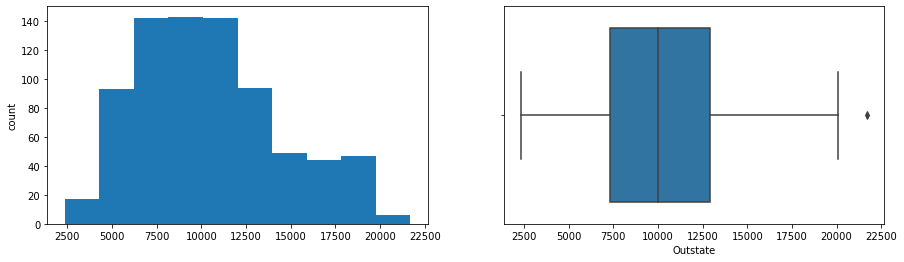

Room_Board
Skew : 0.48


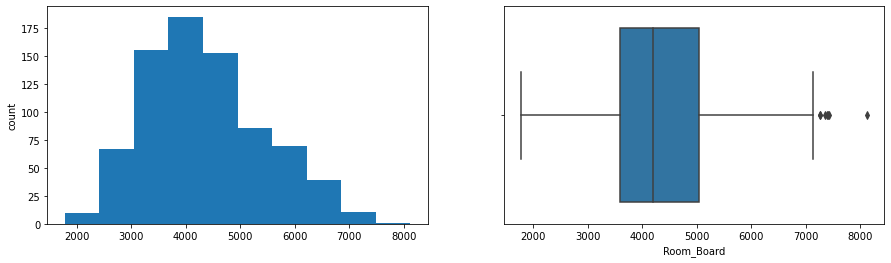

Books
Skew : 3.49


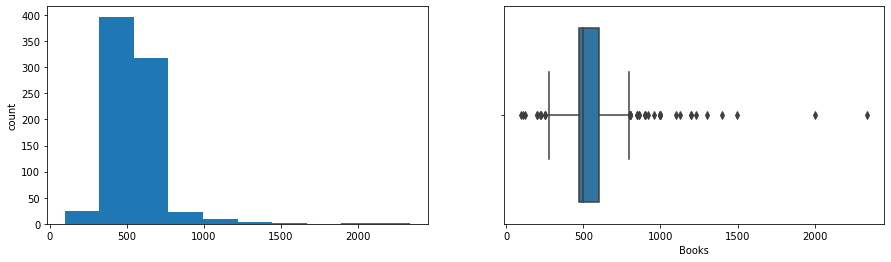

Personal
Skew : 1.74


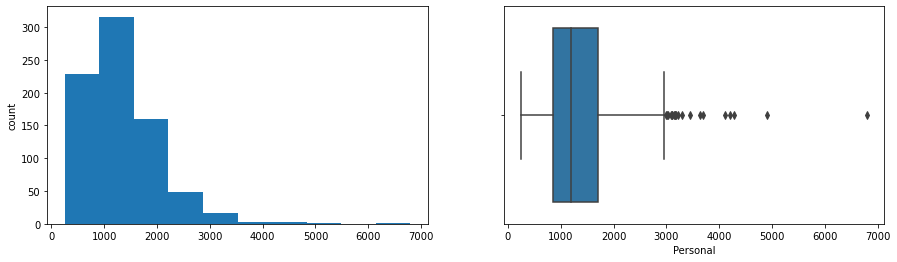

PhD
Skew : -0.77


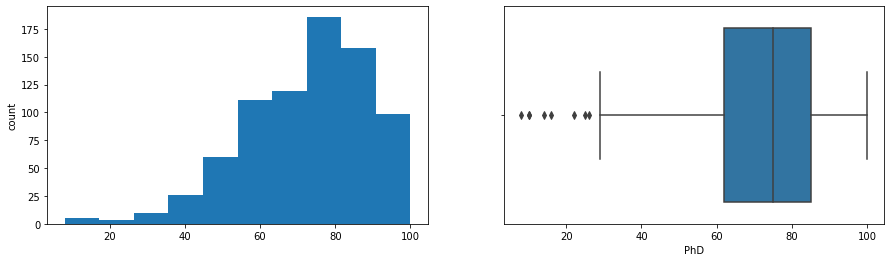

Terminal
Skew : -0.82


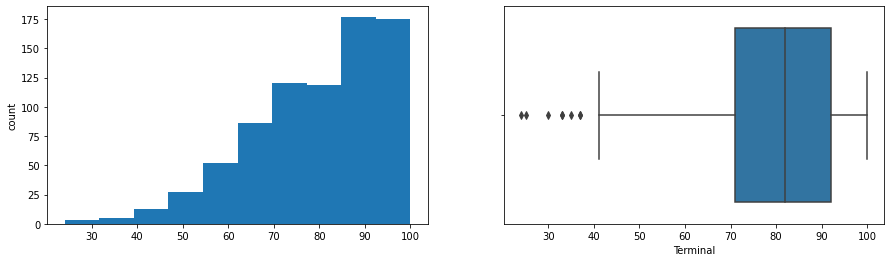

S_F_Ratio
Skew : 0.67


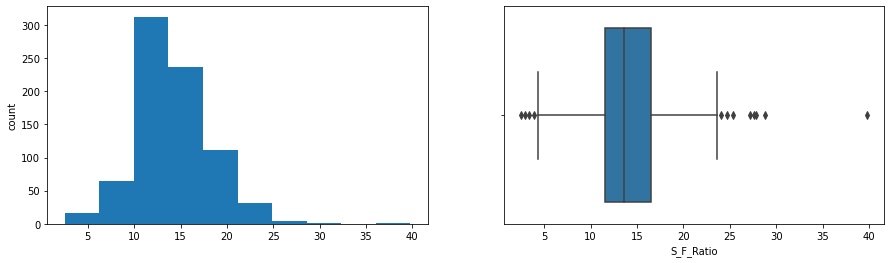

perc_alumni
Skew : 0.61


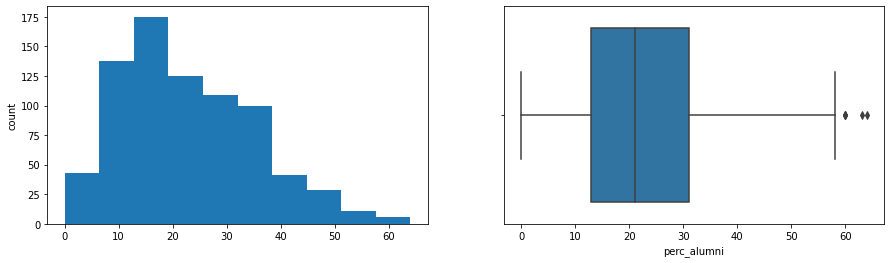

Expend
Skew : 3.46


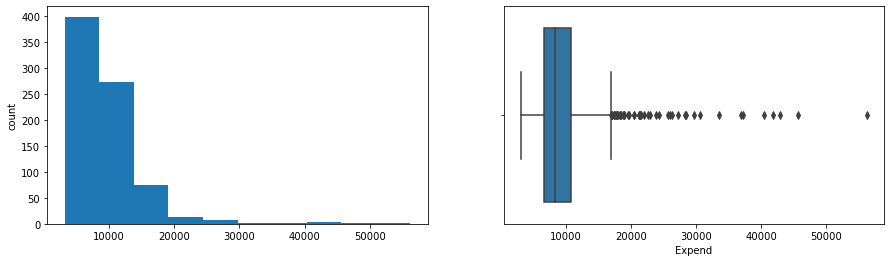

Grad_Rate
Skew : -0.14


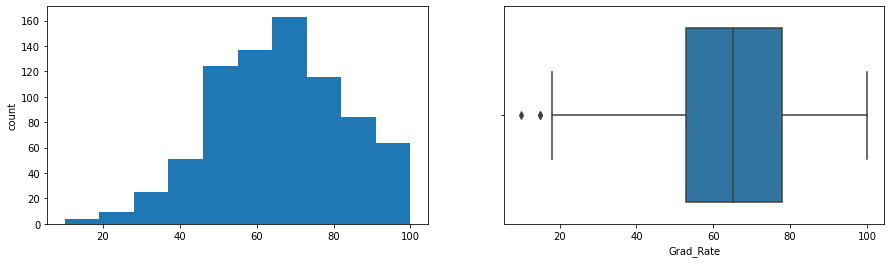

Target
Skew : 1.97


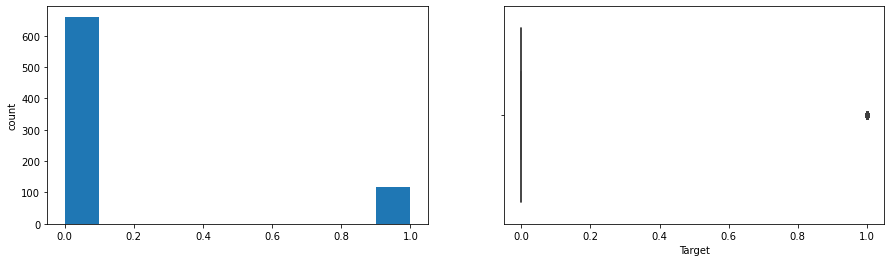

In [35]:
cont_cols = list(data.columns)
for col in cont_cols:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

**Observations:**

- The distribution plots show that Apps, Accept, Enroll, Top10perc, F_Undergrad, P_Undergrad, Books, Personal and Expend variables are highly right skewed. It is evident from boxplots that all these variables have outliers.
- Top25percent is the only variable which does not possess outliers.
- Outstate, Room_Board, S_F_Ratio and perc_alumni seems to have a moderate right skew.
- PhD and Terminal are moderately left skewed. 

**Now, let's check the correlation among different variables.**

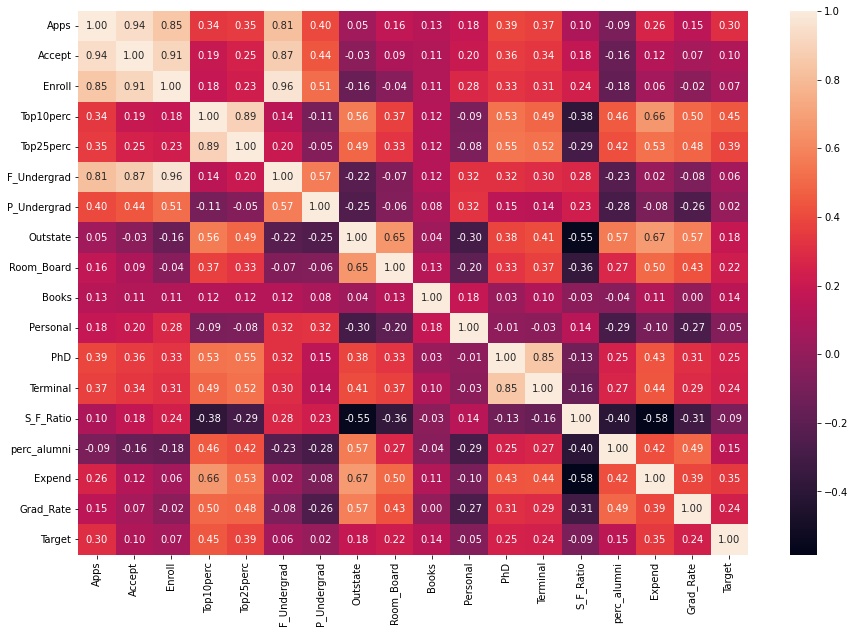

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt='0.2f')
plt.show()

**Observations:**

- We can see high positive correlation among the following variables: 
    1. Apps and Accept
    2. Apps and Enroll
    3. Apps and F_Undergrad
    4. Accept and Enroll
    5. Accept and F_Undergrad
    6. Enroll and F_Undergrad
    7. Top10perc and Top25percent
    8. PhD and Terminal
- We can see high negative correlation among the following variables:
    1. S_F_Ratio and Top10perc
    2. S_F_Ratio and Expend

#### Scaling the data

In [37]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



In [38]:
df =data
# Separate the target variable from the features
X = df.drop("Target", axis=1)
y = df["Target"]

# Preprocess the data by standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Define the machine learning models to try
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Support Vector Machine", SVC())
]

# Fit each model and evaluate it using cross-validation
results = []
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5)
    results.append((name, np.mean(scores), np.std(scores)))
    
# Print the cross-validation results
for name, mean_score, std_score in results:
    print(f"{name}: {mean_score:.3f} +/- {std_score:.3f}")



# Select the best model based on the cross-validation score
best_model_name, best_model_score, _ = max(results, key=lambda x: x[1])
best_model = dict(models)[best_model_name]
print(f"Best model: {best_model_name} ({best_model_score:.3f} CV score)")

# Train the best model on the full training set and evaluate it on the test set
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy:.3f}")


from sklearn.metrics import confusion_matrix

def print_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion matrix:")
    print(cm)

# Train the best model on the full training set and evaluate it on the test set
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy:.3f}")

# Print the confusion matrix for the best model on the test data
print_confusion_matrix(best_model, X_test, y_test)


Logistic Regression: 0.921 +/- 0.013
Decision Tree: 0.874 +/- 0.013
Random Forest: 0.905 +/- 0.017
Support Vector Machine: 0.905 +/- 0.016
Best model: Logistic Regression (0.921 CV score)
Test accuracy: 0.891
Test accuracy: 0.891
Confusion matrix:
[[128   0]
 [ 17  11]]


In [39]:
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [40]:
data_scaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate,Target
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.162859,-0.115729,1.013776,-0.867574,-0.501910,-0.317993,-0.418917
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.676529,-3.378176,-0.477704,-0.544572,0.166110,-0.551805,-0.418917
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.205112,-0.931341,-0.300749,0.585935,-0.177290,-0.668710,-0.418917
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185939,1.175657,-1.615274,1.151188,1.792851,-0.376446,-0.418917
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204995,-0.523535,-0.553542,-1.675079,0.241803,-2.948375,-0.418917


## Principal Component Analysis

In [41]:
data_scaled.shape[1]

18

In [42]:
#Defining the number of principal components to generate 
n=data_scaled.shape[1]

#Finding principal components for the data
pca = PCA(n_components=n, random_state=1)
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

In [43]:
pca.explained_variance_ratio_.cumsum()

array([0.31252791, 0.56136211, 0.62747612, 0.68491383, 0.74069488,
       0.78918686, 0.83258165, 0.86587093, 0.89816052, 0.92502593,
       0.94739352, 0.96430217, 0.97603129, 0.98435604, 0.99227255,
       0.9969877 , 0.99885096, 1.        ])

In [44]:
# find the least number of components that can explain more than 70% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 70% variance: ", ix+1)
    break

Number of PCs that explain at least 70% variance:  10


**Observations**:

-  We can see that out of the 17 original features, we reduced the number of features through principal components to 4, these components explain approximately 70% of the original variance.

- So that is about 76% reduction in the dimensionality with a loss of 30% in variance.

- Let us now look at these principal components as a linear combination of original features.

In [45]:
pca.components_

array([[ 0.24369209,  0.19716705,  0.16622533,  0.35314221,  0.34090663,
         0.14530845,  0.0227864 ,  0.2881504 ,  0.24493525,  0.06651184,
        -0.04389337,  0.31051087,  0.3088079 , -0.17296397,  0.20196344,
         0.31592642,  0.25052564,  0.19265482],
       [ 0.33469324,  0.37514107,  0.40626457, -0.07799617, -0.04036728,
         0.41986074,  0.31536329, -0.24524116, -0.13425572,  0.05692347,
         0.2192323 ,  0.06265318,  0.05081711,  0.24388753, -0.24359225,
        -0.12742603, -0.16597335, -0.01292965],
       [-0.04872376, -0.1252159 , -0.10007093,  0.0849955 ,  0.0230591 ,
        -0.07611343,  0.10401905, -0.01778314,  0.08428517,  0.68640843,
         0.4723723 , -0.15804614, -0.10796485, -0.21396965, -0.15646353,
         0.19631751, -0.19677607,  0.2483768 ],
       [ 0.04350505, -0.07536485, -0.0196554 ,  0.29419453,  0.3149311 ,
        -0.01922081, -0.24050741, -0.26641552, -0.39238005,  0.01935157,
        -0.09388977, -0.09178465, -0.15220622,  0.322

In [46]:
pc_comps = ['PC1','PC2','PC3','PC4','PC5']
data_pca = pd.DataFrame(np.round(pca.components_[:5,:],2),index=pc_comps,columns=data_scaled.columns)
data_pca.T

,PC1,PC2,PC3,PC4,PC5
Apps,0.24,0.33,-0.05,0.04,0.28
Accept,0.20,0.38,-0.13,-0.08,0.27
Enroll,0.17,0.41,-0.10,-0.02,0.16
Top10perc,0.35,-0.08,0.08,0.29,-0.05
Top25perc,0.34,-0.04,0.02,0.31,-0.11
F_Undergrad,0.15,0.42,-0.08,-0.02,0.10
P_Undergrad,0.02,0.32,0.10,-0.24,-0.16
Outstate,0.29,-0.25,-0.02,-0.27,0.13
Room_Board,0.24,-0.13,0.08,-0.39,0.18
Books,0.07,0.06,0.69,0.02,0.08


**Observations:**

- Each principal component is a linear combination of original features. For example, we can write the equation for PC1 in the following manner:

0.25 * Apps + 0.21 * Accept + 0.18 * Enroll + 0.35 * Top10perc + 0.34 * Top25perc + 0.15 * F_Undergrad + 0.03 * P_Undergrad + 0.29 * Outstate + 0.25 * Room_Board + 0.06 * Books + -0.04 * Personal + 0.32 * PhD + 0.32 * Terminal + -0.18 * S_F_Ratio + 0.21 * perc_alumni + 0.32 * Expend + 0.25 * Grad_Rate

- For the business implications, the first two principal components picks up around 58% of the variability in the data. That is to say, picking up a considerable amount of variation in the data.

- The explanation of each component along with their weights is also one of the ways to look at it. For example, we can consider weights with absolute value greater than 0.25 significant and analyze the each component.

**NOTE: Decision regarding what value of weights is high or significant may vary from case to case. It depends on the problem at hand.**

In [47]:
def color_high(val):
    if val <-0.25: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >0.25:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3,PC4,PC5
Apps,0.240000,0.330000,-0.050000,0.040000,0.280000
Accept,0.200000,0.380000,-0.130000,-0.080000,0.270000
Enroll,0.170000,0.410000,-0.100000,-0.020000,0.160000
Top10perc,0.350000,-0.080000,0.080000,0.290000,-0.050000
Top25perc,0.340000,-0.040000,0.020000,0.310000,-0.110000
F_Undergrad,0.150000,0.420000,-0.080000,-0.020000,0.100000
P_Undergrad,0.020000,0.320000,0.100000,-0.240000,-0.160000
Outstate,0.290000,-0.250000,-0.020000,-0.270000,0.130000
Room_Board,0.240000,-0.130000,0.080000,-0.390000,0.180000
Books,0.070000,0.060000,0.690000,0.020000,0.080000


In [48]:
pca = PCA(n_components=9, random_state=1)
data_pca_final = pd.DataFrame(pca.fit_transform(data_scaled))
data_pca_final

,0,1,2,3,4,5,6,7,8
0,-1.647348,0.750331,-0.036392,0.476658,-0.919121,-0.642737,0.134018,0.886385,-0.613087
1,-2.223139,-0.602641,2.109358,-1.307104,3.566558,0.410538,-0.561954,0.405088,0.429436
2,-1.477483,-1.105987,-0.466574,0.039598,0.690255,-0.973393,-0.314287,-0.349483,0.178802
3,2.751361,-2.586013,-0.114277,-0.565352,-1.287168,-1.082402,-0.356872,-1.113059,-0.481871
4,-2.247855,-0.001780,2.271462,-0.892982,-1.120168,0.389825,-0.529023,-1.797368,-1.244111
...,...,...,...,...,...,...,...,...,...
772,-3.360493,1.180962,-0.322530,-0.082743,0.112318,0.843505,-0.522593,-0.130828,0.490185
773,0.120557,-0.678983,-0.128925,-0.591517,0.545423,0.272481,0.585099,0.515939,0.749039
774,-0.791935,-0.081926,0.066187,0.453531,0.068032,0.110847,0.330621,-1.183297,-0.506237
775,8.271085,-1.993742,2.255368,0.331989,0.859686,-1.844206,-1.495168,0.442875,-0.243384


In [49]:
df =data
# Separate the target variable from the features
X = data_pca_final
y = df["Target"]

# Preprocess the data by standardizing the features
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Define the machine learning models to try
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Support Vector Machine", SVC())
]

# Fit each model and evaluate it using cross-validation
results = []
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5)
    results.append((name, np.mean(scores), np.std(scores)))
    
# Print the cross-validation results
for name, mean_score, std_score in results:
    print(f"{name}: {mean_score:.3f} +/- {std_score:.3f}")



# Select the best model based on the cross-validation score
best_model_name, best_model_score, _ = max(results, key=lambda x: x[1])
best_model = dict(models)[best_model_name]
print(f"Best model: {best_model_name} ({best_model_score:.3f} CV score)")

# Train the best model on the full training set and evaluate it on the test set
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy:.3f}")


from sklearn.metrics import confusion_matrix

def print_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion matrix:")
    print(cm)

# Train the best model on the full training set and evaluate it on the test set
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy:.3f}")

# Print the confusion matrix for the best model on the test data
print_confusion_matrix(best_model, X_test, y_test)


Logistic Regression: 1.000 +/- 0.000
Decision Tree: 0.965 +/- 0.012
Random Forest: 0.987 +/- 0.011
Support Vector Machine: 0.994 +/- 0.006
Best model: Logistic Regression (1.000 CV score)
Test accuracy: 1.000
Test accuracy: 1.000
Confusion matrix:
[[128   0]
 [  0  28]]


**Observations:**

- The first principal component, PC1, is related to high values of students scores (Top10perc, Top25perc), number of out-of-state students (Outstate), faculties education (PhD and Terminal) and the instructional expenditure (Expend) per student. This principal component seams to capture attributes that generally define premier colleges with high quality of students entering them and higher accomplished faculty that is teaching there. They also seems to take rich students from all over the country. 
- The second principal component, PC2, is related to high values of number of applications - received (Apps), accepted (Accept) and enrolled (Enroll), and number of full time (F_Undergrad) and part time (P_Undergrad) students. This principal component seems to capture attributes that generally define non-premier colleges that are comparatively easier to get admissions into.
- The third principal component, PC3, is related to financial aspects i.e. personal spending (Personal) and cost of books (Books) for a student. It is also associated with low values of student faculty ratios (S_F_Ratio).
- The fourth principal component, PC4, is related to low values of faculty's education and high values of students' graduation rate. This principal component seems to capture attributes that define colleges which lack the highly educated faculty (PhD and Terminal) but it is comparatively easier to graduate from there (Grad_Rate).

#### We can also visualize the data in 2 dimensions using first two principal components 

Text(0, 0.5, 'PC2')

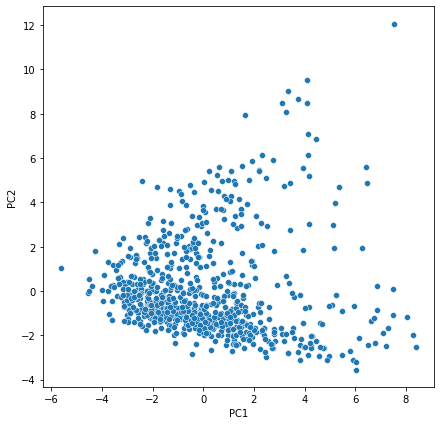

In [50]:
plt.figure(figsize = (7,7))
sns.scatterplot(x=data_pca1[0],y=data_pca1[1])
plt.xlabel("PC1")
plt.ylabel("PC2")